# Arboles de Regresion
La diferencia entre el Arbol de desicion y un arbol de regresion lineal, es que este ultimo tiene la particulearidad de tener varaibles numericas continuas. Lo que significa que puede tomar cualquier valor real, lo que diferencia? es que en el anterior modelo la variable objetivo se buscaba categorizar.

El `algoritmo` es muy util cuando se posee multiple rasgos dentro del dataset los cuales interactuan entre ellos (a diferencia del logico y lineal), es decir que existe una complejidad (por ejemplo existe una probabilidad para que la desicion cambie a otro campo.

`particione recursiva`: el algoritmo de solucion es muy similar a esta idea que se puede apreciar en las regresiones lineales y logistica. Dividir el dataset en subconjuntos mas pequenios y en base de esto trabajarlos.

Se especifica algun modo para ir moviendose entre los nodos (normalmente se tiene en cuenta la variancia como se trabajo anteriormente).

El criterio mas comun para parar es el nivel de profunidad, un punto donde la eficiencia disminuye si se sigue adelante.

Una vez que se llegue a un nodo hoja que tendra el modelo mas conveniente, se empezaran a ajustar los valores para determinar una desicion.


**Resumen:**
* Empezamos con un nodo con todas las observacioens.
    * Calculamos la media y la varianza de la variable objetivo.
* Calculamos la reduccion de la varianza para todos los posibles candidadtos a variables del siguiente nodo eligiendo la que da maxima reduccion de la misma es el nodo.
* Para cada nodo hoja somprobamos si:
    * La reduccion maxima de la varianza es menor que un valor fijo.
    * El numero de observaciones en dicho nodo es menor que un nodo valor fijo.

In [3]:
import pandas as pd

/home/santiago/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [4]:
data = pd.read_csv('../python-ml-course-master/datasets/boston/Boston.csv')
data.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [5]:
data.shape

(506, 14)

In [6]:
import numpy as np
data['is_traning'] = np.random.uniform(0,1,len(data)) <=0.75
data['is_traning'].sum()

400

In [7]:
columns = data.columns.values.tolist()
predicts = columns[:13]
target = columns[13]
train, test = data[data['is_traning']==True],data[data['is_traning']==False]
x = train[predicts]
y = train[target]

In [8]:
from sklearn.tree import DecisionTreeRegressor

In [9]:
regtree = DecisionTreeRegressor(min_samples_leaf=10,min_samples_split=30,random_state=0)

In [10]:
regtree.fit(x,y)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=10, min_samples_split=30,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=0, splitter='best')

In [11]:
preds = regtree.predict(test[predicts])

In [ ]:
test['preds'] = preds

In [17]:
test[['medv','preds']]

,medv,preds
0,24.0,23.140741
20,13.6,15.200000
26,16.6,19.052941
27,14.8,15.200000
29,21.0,19.052941
...,...,...
496,19.7,19.376923
498,21.2,22.326087
500,16.8,20.937931
502,20.6,30.770000


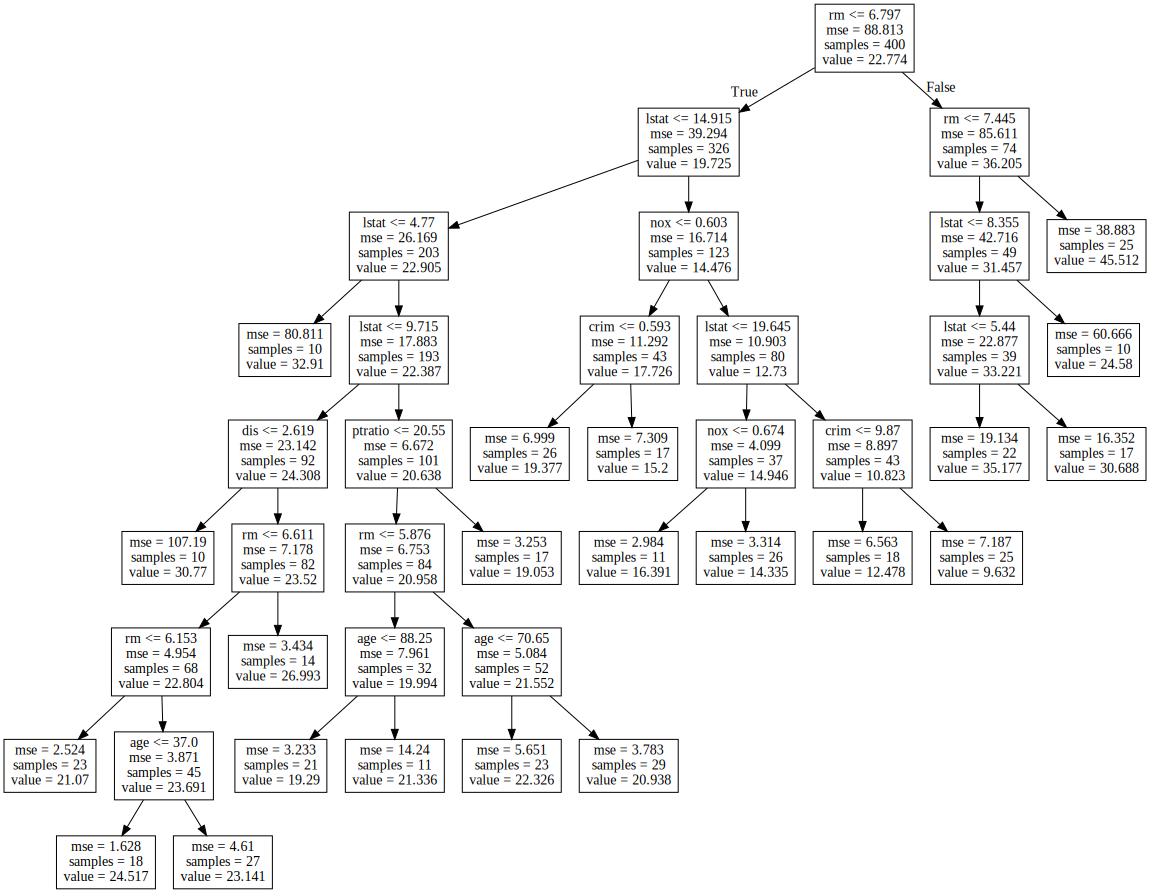

In [21]:
from sklearn.tree import export_graphviz
with open('../recursos/boston_dtree.dot','w') as dot_file:
    export_graphviz(regtree,out_file=dot_file,feature_names=predicts)
    dot_file.close()
import os
from graphviz import Source
file = open('../recursos/boston_dtree.dot','r')
text = file.read()
Source(text)

In [22]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
import numpy as np

In [26]:
cv = KFold(n_splits=106,shuffle=True,random_state=1)
scores = cross_val_score(regtree,test[predicts],test[target],scoring='neg_mean_squared_error',cv=cv, n_jobs=1)
print(scores.shape)
score = np.mean(scores)
print(-score)

(106,)
24.214713596255766


In [28]:
list(zip(predicts,regtree.feature_importances_))

[('crim', 0.008842697609492129),
 ('zn', 0.0),
 ('indus', 0.0),
 ('chas', 0.0),
 ('nox', 0.02446463556851147),
 ('rm', 0.6699004326913223),
 ('age', 0.0025239815012396277),
 ('dis', 0.01568911071789279),
 ('rad', 0.0),
 ('tax', 0.0),
 ('ptratio', 0.001718752844946253),
 ('black', 0.0),
 ('lstat', 0.27686038906659544)]

Como conclusion podemos ver la importancia que tiene cada uno de los elementos, lo que nos va a permitir podar un poco y reajustar la profundidad.

Muchas veces estos tipos de trabajos requieren que se vuelva a repetir los casos hasta que den valores bastante buenos sin la necesidad de grandes gastos de procesamiento.